## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
 
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
 
And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.


In [507]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [508]:
# load the data into dataframe

country = pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [509]:
# checking no. of rows and columns in the dataset
country.shape

(167, 10)

In [510]:
# exports, import and health are given as % of of gdp. lets convert them into exact nos.
country['exports'] = country['exports']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100

In [511]:
# checking numeric variables
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


As expected there are outliers present in the dataset

In [512]:
# checking the information
country.info()

# no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [513]:
# lets reconfirm the null values in the dataset
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

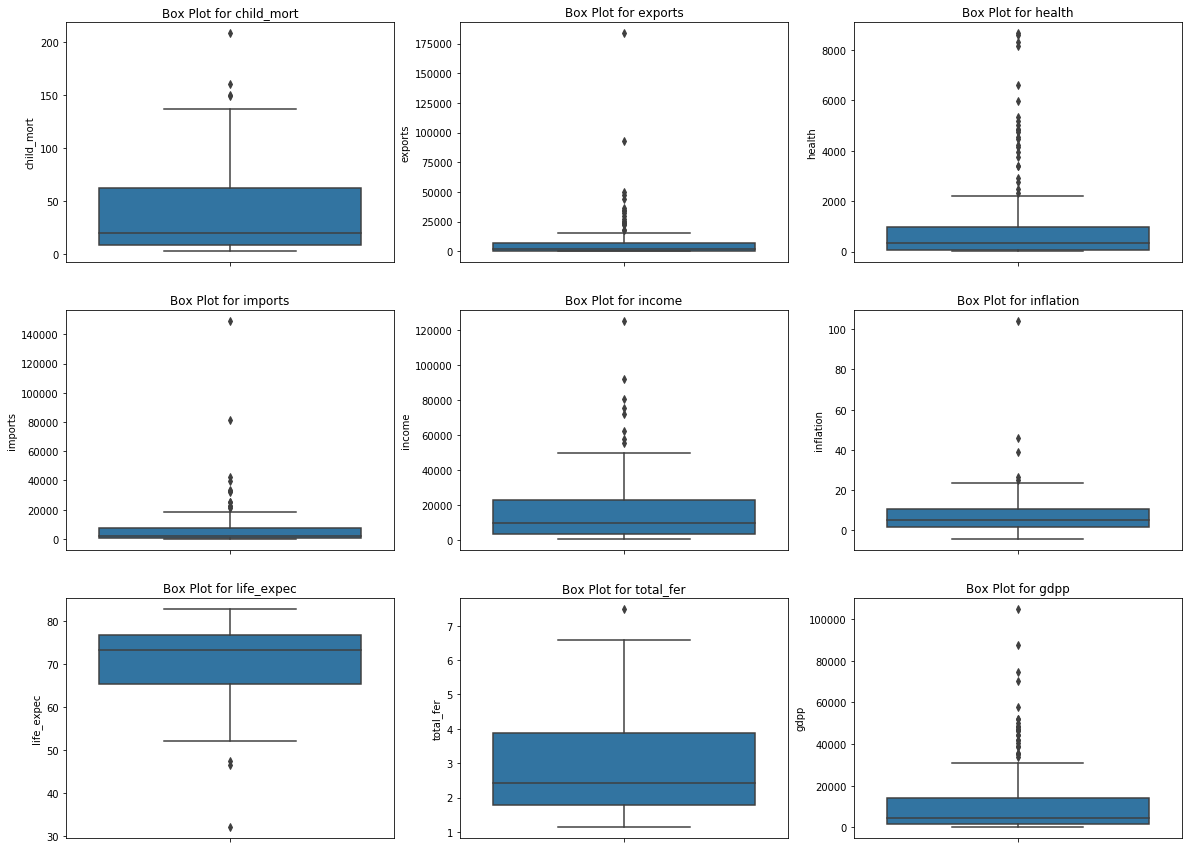

In [514]:
# lets check for outliers in the data set
cols = country.drop("country",1)

plt.figure(figsize=(20,15))
for idx,col in enumerate(cols):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(y=col, data =country)
    plt.title("Box Plot for "+ col)
    
plt.show()

There are outliers present in the dataset, we will treat them later

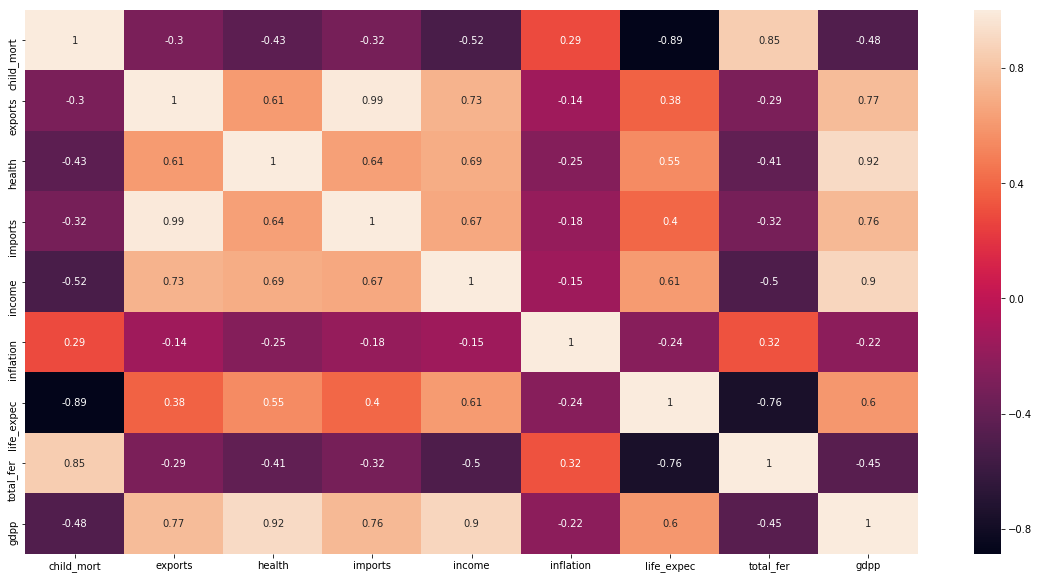

In [515]:
# lets check the correlation between different features
plt.figure(figsize = (20,10))        
sns.heatmap(country.corr(),annot = True)

Lot of variables are correlated hence its a good data set to apply PCA.

# PCA

In [516]:
# Lets apply scaling to the variables
from sklearn.preprocessing import StandardScaler

data = country.drop(["country"],axis = 1)

scaler = StandardScaler()
scaled_data =  scaler.fit_transform(data)

# lets check the dataframe with the scaled values
scaled_data

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [517]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [518]:
# fit the model to the scaled data
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [519]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [520]:
#Let's check the variance ratios
print("variance explained by PCs:",pca.explained_variance_ratio_)

variance explained by PCs: [5.89372984e-01 1.84451685e-01 9.91147170e-02 6.07227801e-02
 3.02917253e-02 2.45982702e-02 9.39743701e-03 1.55641971e-03
 4.93981394e-04]


In [521]:
# cumulative variance explained by PCs
print("\ncumulative variance explained by PCs:",np.cumsum(pca.explained_variance_ratio_))

# top 3 PCs are explaining 87% variation present in the dataset


cumulative variance explained by PCs: [0.58937298 0.77382467 0.87293939 0.93366217 0.96395389 0.98855216
 0.9979496  0.99950602 1.        ]


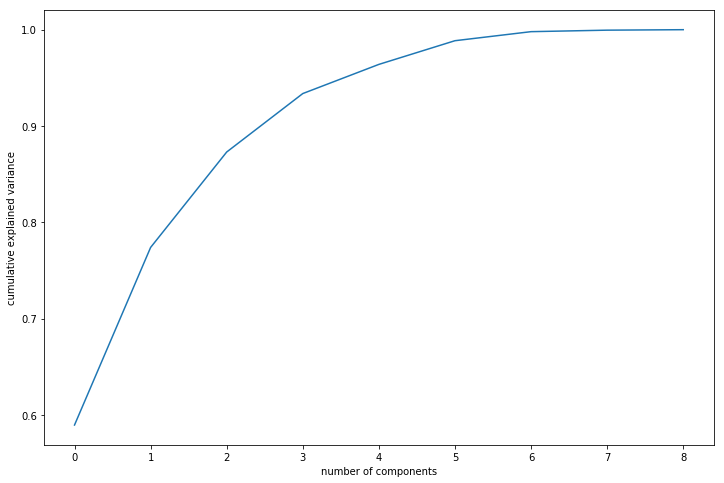

In [522]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Graph shows the same thing that we discussed above, top 3 PCs explaining 87% of the variation present in the dataset

In [523]:
#Let's try and check the first three components now
colnames = list(data.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


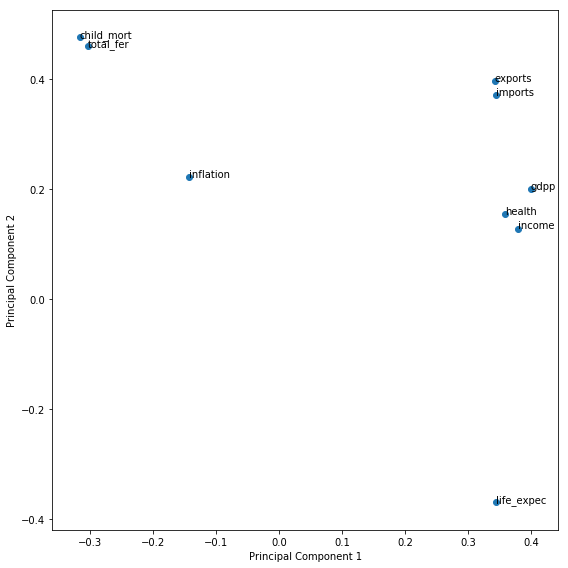

In [524]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [525]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [526]:
# fit and transform the scaled dataset 
df_train_pca = pca_final.fit_transform(scaled_data)
df_train_pca.shape

(167, 3)

In [527]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

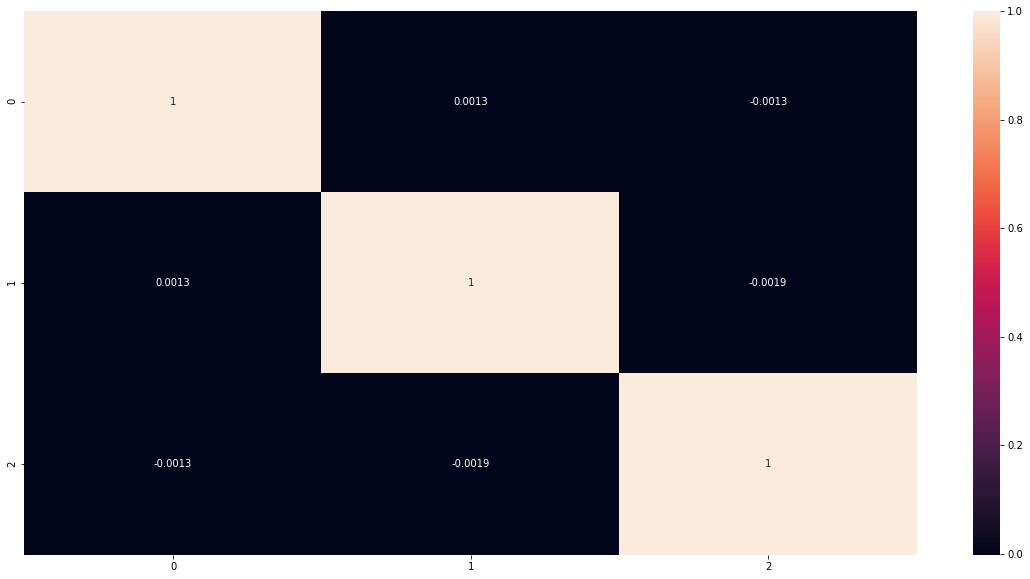

In [528]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

features present in the transformed dataset are not correlated to each other 

In [529]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0012693211570615113 , min corr:  -0.0018789902611897537


In [530]:
# lets take the transpose of the trained dataset
pc = np.transpose(df_train_pca)
pc

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [531]:
#Let's create the newer matrix according to the given principal components
rownames = list(country['country'])
pcs_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pcs_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


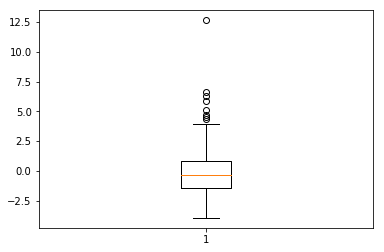

In [532]:
#Let's do the outlier analysis before proceeding to clustering
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

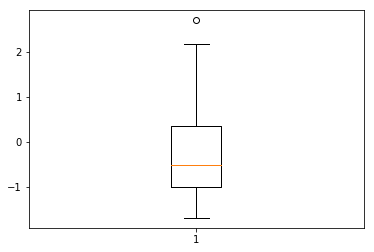

In [533]:
# outlier treatment for PC2
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

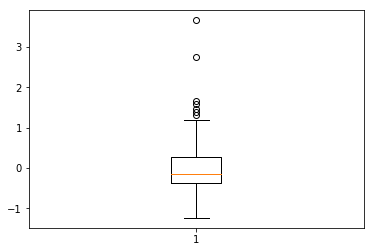

In [534]:
# outlier treatment for PC3
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
dat3 = pcs_df2[(pcs_df2.PC3 >= Q1 ) & (pcs_df2.PC3 <= Q3)]

In [535]:
#Outlier analysis is now done.Let's check the data again.
pcs_df2.shape

(133, 4)

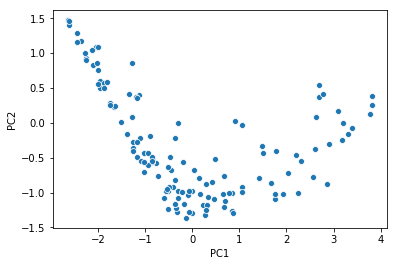

In [536]:
#let's check the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

## Lets check whether the data is good enough for clustering using hopkins method

### The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [537]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [538]:
from numpy.random import uniform
from random import sample
from sklearn.neighbors import NearestNeighbors
from math import isnan
hopkins(pcs_df2.drop(["country"],1))

0.7972728776632388

hopkin score of .80 is a good number, data is good enough to make clusters

## Now lets do Silhouette Analysis
### silhouette score=p−qmax(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [539]:
# lets scale the dataset
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

pcs_df3 = pcs_df2
pcs_df3 = standard_scaler.fit_transform(pcs_df3.drop(['country'],axis=1))

In [540]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df3)
    sse_.append([k, silhouette_score(pcs_df3, kmeans.labels_)])

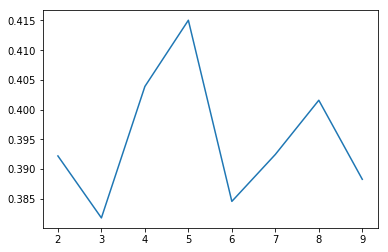

In [541]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

silhoutee score is maximum for 5 clusters

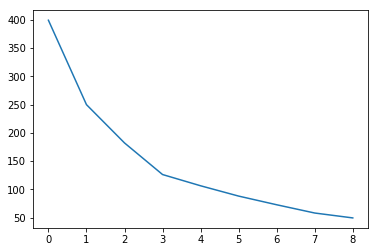

In [542]:
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [543]:
# Lets make a model with k = 5 first
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(pcs_df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [544]:
# lets concatenate the cluster ids to the PCA transformed dataset
pcs_df4=pcs_df2
pcs_df4.index = pd.RangeIndex(len(pcs_df4.index))
dat_km = pd.concat([pcs_df4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,4
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
3,Argentina,0.037197,-0.680889,1.466963,4
4,Armenia,-0.332692,-1.274517,0.176636,1


In [545]:
# add cluster ids to the original dataset
pcs_df5=pd.merge(country,dat_km,on='country')
pcs_df6=pcs_df5[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
pcs_df6.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,4
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,1
3,Argentina,14.5,1946.70,1648.000,834.3000,18700,20.90,75.8,2.37,10300,4
4,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,1


In [546]:
pcs_df6.shape

(133, 11)

# Cluster Analysis

In [547]:
# lets check if each cluster has enough no. of data points
pcs_df6['ClusterID'].value_counts()

1    59
2    25
0    23
4    18
3     8
Name: ClusterID, dtype: int64

In [548]:
# lets take mean of the available features, these would be helpful for cluster analysis
clu_chi  = pd.DataFrame(pcs_df6.groupby(["ClusterID"]).child_mort.mean())
clu_exp  = pd.DataFrame(pcs_df6.groupby(["ClusterID"]).exports.mean())
clu_imp  = pd.DataFrame(pcs_df6.groupby(["ClusterID"]).imports.mean())
clu_hea  = pd.DataFrame(pcs_df6.groupby(["ClusterID"]).health.mean())
clu_inc  = pd.DataFrame(pcs_df6.groupby(["ClusterID"]).income.mean())
clu_inf  = pd.DataFrame(pcs_df6.groupby(["ClusterID"]).inflation.mean())         
clu_lif  = pd.DataFrame(pcs_df6.groupby(["ClusterID"]).life_expec.mean())
clu_tot  = pd.DataFrame(pcs_df6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = pd.DataFrame(pcs_df6.groupby(["ClusterID"]).gdpp.mean())

final = pd.concat([pd.Series([0,1,2,3,4]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
final.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
final

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,76.430435,485.824643,714.944348,114.228113,3166.086957,5.575000,59.991304,4.516087,1521.130435
1,1,23.915254,2630.338958,2936.574764,379.005702,10479.661017,5.145102,72.542373,2.373729,5780.033898
2,2,4.972000,13549.368000,13383.932000,3417.322400,34832.000000,1.432920,79.972000,1.726000,34532.000000
3,3,66.525000,1364.012500,966.090000,170.390000,6171.250000,19.887500,65.725000,4.827500,3111.250000
4,4,18.622222,7352.374444,4631.521667,509.966833,27974.444444,19.033333,73.205556,2.273333,13104.444444


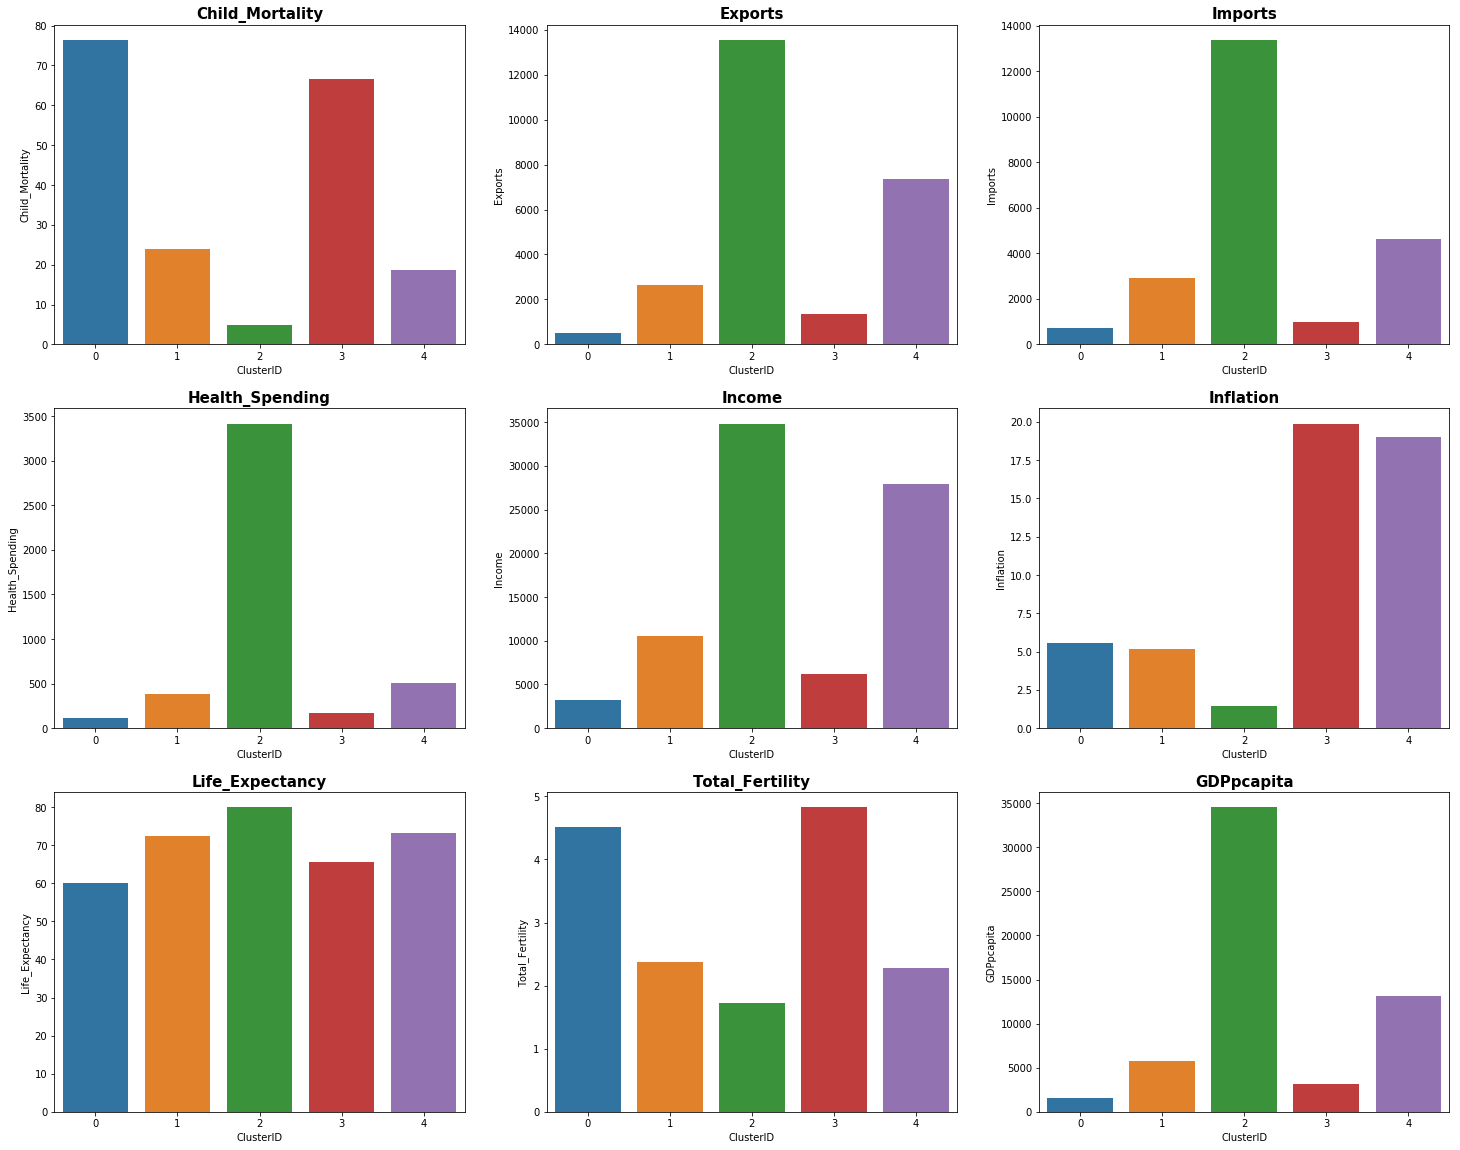

In [549]:
# lets visualise the cluster formed
fig= plt.figure(figsize = (25,20))

for idx,col in enumerate(final.drop("ClusterID",1)):
    plt.subplot(3,3,idx+1)
    sns.barplot(x=final.ClusterID, y=final[col])
    plt.title(col,fontsize = 15,fontweight='bold')
    
plt.show()

from above graphs we can conclude that gdpp, income & child mort seems to have good variations for different clusters, lets use these variables to filter the dataset and come up with the final list of poor countries

In [550]:
# from the above data, we know that average gdpp for cluster 0 is minimum i.e. 1500
# lets create a dataframe with gdpp less than 1500
poor1 = country[country.gdpp<=1500]

# income is minimum average income is around 3100, lets filter the dataset
poor2 = poor1[poor1.income<=3100]

# max average child mort is around 76, lets apply another filter
poor3 = poor2[poor2.child_mort>=76]
print("Final list of poor countries\n:",poor3)

Final list of poor countries
:                       country  child_mort   exports    health   imports  \
0                 Afghanistan        90.2   55.3000   41.9174   248.297   
17                      Benin       111.0  180.4040   31.0780   281.976   
25               Burkina Faso       116.0  110.4000   38.7550   170.200   
26                    Burundi        93.6   20.6052   26.7960    90.552   
28                   Cameroon       108.0  290.8200   67.2030   353.700   
31   Central African Republic       149.0   52.6280   17.7508   118.190   
32                       Chad       150.0  330.0960   40.6341   390.195   
36                    Comoros        88.2  126.8850   34.6819   397.573   
37           Congo, Dem. Rep.       116.0  137.2740   26.4194   165.664   
40              Cote d'Ivoire       111.0  617.3200   64.6600   528.260   
56                     Gambia        80.3  133.7560   31.9778   239.974   
63                     Guinea       109.0  196.3440   31.9464   279.9

# Hierarchical Clustering

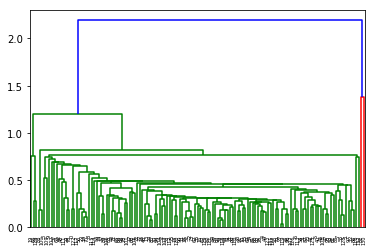

In [551]:
# single linkage procedure.
mergings = linkage(pcs_df3, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

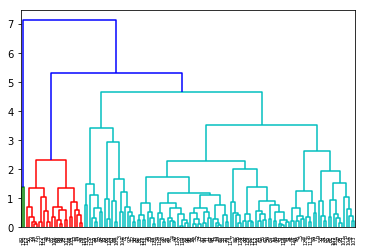

In [552]:
#Let's try complete linkage method
mergings = linkage(pcs_df3, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [553]:
# we see good clustering here, lets cut the clusters
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
pcs_df2_hc = pd.concat([pcs_df2, clusterCut], axis=1)
pcs_df2_hc.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']

In [554]:
pcs_df2_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Argentina,0.037197,-0.680889,1.466963,1
4,Armenia,-0.332692,-1.274517,0.176636,2


In [555]:
pcs_df7=pd.merge(country,pcs_df2_hc,on='country')
pcs_df8=pcs_df7[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
pcs_df8.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,2
3,Argentina,14.5,1946.70,1648.000,834.3000,18700,20.90,75.8,2.37,10300,1
4,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,2


In [556]:
# lets check if the clusters formed have good no. of countries 
pcs_df8['ClusterID'].value_counts()

2    61
3    26
0    23
1    21
4     2
Name: ClusterID, dtype: int64

In [557]:
#Cluster 4 doesn't have enough amount of clusters. Let's check other clusters
pcs_df8[pcs_df8['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.00000,7185.800000,735.6600,19100,1.440,76.8,2.13,12200,2
4,Armenia,18.1,669.76000,1458.660000,141.6800,6700,7.770,73.3,1.69,3220,2
7,Azerbaijan,39.2,3171.12000,1208.880000,343.3920,16000,13.800,69.1,1.92,5840,2
10,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,2
11,Barbados,14.2,6320.00000,7792.000000,1275.2000,15300,0.321,76.7,1.78,16000,2
13,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,2
15,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,2
16,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,2
18,Brazil,19.8,1198.40000,1321.600000,1009.1200,14500,8.410,74.2,1.80,11200,2
20,Bulgaria,10.8,3433.68000,3625.200000,469.9080,15300,1.110,73.9,1.57,6840,2


In [558]:
# cluster 3
pcs_df8[pcs_df8['ClusterID']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
5,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,3
6,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,3
8,Bahamas,13.8,9800.0,12236.0,2209.20,22900,-0.393,73.8,1.86,28000,3
9,Bahrain,8.6,14386.5,10536.3,1028.79,41100,7.440,76.0,2.16,20700,3
23,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,3
31,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,3
32,Czech Republic,3.4,13068.0,12454.2,1560.24,28300,-1.430,77.5,1.51,19800,3
40,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,3
41,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,3
45,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,3


In [559]:
# cluster 0
pcs_df8[pcs_df8['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,0
14,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,0
17,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.920,57.1,2.88,6350,0
22,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,0
28,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,0
37,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.600,61.7,4.61,482,0
43,Gambia,80.3,133.7560,239.974,31.9778,1660,4.300,65.5,5.71,562,0
50,Guinea-Bissau,114.0,81.5030,192.544,46.4950,1390,2.970,55.6,5.05,547,0
64,Kenya,62.2,200.1690,324.912,45.9325,2480,2.090,62.8,4.37,967,0
65,Kiribati,62.7,198.1700,1190.510,168.3700,1730,1.520,60.7,3.84,1490,0


In [560]:
#looks like clusters are not formed correctly, lets visualize the clusters, we would stick with the clusters we formed earlier